In [233]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Model prep and Modeling 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import neighbors

# Evaluate
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import mse, rmse

In [234]:
df = pd.read_csv('Desktop/Thinkful/austin_weather.csv')
df.head(3)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
Date                          1319 non-null object
TempHighF                     1319 non-null int64
TempAvgF                      1319 non-null int64
TempLowF                      1319 non-null int64
DewPointHighF                 1319 non-null object
DewPointAvgF                  1319 non-null object
DewPointLowF                  1319 non-null object
HumidityHighPercent           1319 non-null object
HumidityAvgPercent            1319 non-null object
HumidityLowPercent            1319 non-null object
SeaLevelPressureHighInches    1319 non-null object
SeaLevelPressureAvgInches     1319 non-null object
SeaLevelPressureLowInches     1319 non-null object
VisibilityHighMiles           1319 non-null object
VisibilityAvgMiles            1319 non-null object
VisibilityLowMiles            1319 non-null object
WindHighMPH                   1319 non-null object
WindAvgMPH                   

In [236]:
del df['TempHighF']
del df['TempLowF']
del df['DewPointHighF']
del df['DewPointLowF']
del df['HumidityHighPercent']
del df['HumidityLowPercent']
del df['SeaLevelPressureHighInches']
del df['SeaLevelPressureLowInches']
del df['VisibilityHighMiles']
del df['VisibilityLowMiles']
del df['WindHighMPH']
del df['WindGustMPH']


In [237]:
df

,Date,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,Events
0,2013-12-21,60,49,75,29.68,7,4,0.46,"Rain , Thunderstorm"
1,2013-12-22,48,36,68,30.13,10,6,0,
2,2013-12-23,45,27,52,30.49,10,3,0,
3,2013-12-24,46,28,56,30.45,10,4,0,
4,2013-12-25,50,40,71,30.33,10,2,T,
5,2013-12-26,48,36,63,30.4,9,3,0,
6,2013-12-27,53,39,65,30.39,9,1,T,
7,2013-12-28,51,39,64,30.17,10,2,T,
8,2013-12-29,50,41,76,30.1,10,5,0,
9,2013-12-30,40,26,60,30.33,10,5,0,


In [238]:
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].apply(lambda x: int(x))

df['DewPointAvgF'] = df['DewPointAvgF'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['DewPointAvgF'] = df['DewPointAvgF'].apply(lambda x: int(x))

df['HumidityAvgPercent'] = df['HumidityAvgPercent'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['HumidityAvgPercent'] = df['HumidityAvgPercent'].apply(lambda x: int(x))

df['SeaLevelPressureAvgInches'] = df['SeaLevelPressureAvgInches'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['SeaLevelPressureAvgInches'] = df['SeaLevelPressureAvgInches'].apply(lambda x: float(x))

df['VisibilityAvgMiles'] = df['VisibilityAvgMiles'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['VisibilityAvgMiles'] = df['VisibilityAvgMiles'].apply(lambda x: int(x))

df['WindAvgMPH'] = df['WindAvgMPH'].apply(lambda x: x.replace('-', '0') if '-' in str(x) else x)
df['WindAvgMPH'] = df['WindAvgMPH'].apply(lambda x: float(x))

In [239]:
df.isnull().sum()*100/len(df)

Date                         0.0
TempAvgF                     0.0
DewPointAvgF                 0.0
HumidityAvgPercent           0.0
SeaLevelPressureAvgInches    0.0
VisibilityAvgMiles           0.0
WindAvgMPH                   0.0
PrecipitationSumInches       0.0
Events                       0.0
dtype: float64

In [240]:
df.describe()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,70.642911,56.332070,66.570887,29.954617,9.078848,5.000758
std,14.045904,15.387522,12.721695,1.441037,1.693019,2.093961
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,46.000000,59.000000,29.910000,9.000000,3.000000
50%,73.000000,61.000000,67.000000,30.000000,10.000000,5.000000
75%,83.000000,69.000000,74.000000,30.100000,10.000000,6.000000
max,93.000000,76.000000,97.000000,30.740000,10.000000,12.000000


In [241]:
df.corr()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
TempAvgF,1.000000,0.837222,0.022763,-0.138524,0.148463,0.034267
DewPointAvgF,0.837222,1.000000,0.450622,0.101505,0.056602,0.038257
HumidityAvgPercent,0.022763,0.450622,1.000000,0.069634,-0.449230,-0.000472
SeaLevelPressureAvgInches,-0.138524,0.101505,0.069634,1.000000,0.260125,0.046604
VisibilityAvgMiles,0.148463,0.056602,-0.449230,0.260125,1.000000,0.026522
WindAvgMPH,0.034267,0.038257,-0.000472,0.046604,0.026522,1.000000


the most correlated variables to HumidityAvgPercent are DewPointAvgF, SeaLevelPressureAvgInches and TempAvgF

## Splitting the data 

In [242]:
# Y is the target variable
Y = np.array(df['HumidityAvgPercent'])
X = np.array(df[['DewPointAvgF','SeaLevelPressureAvgInches', 'TempAvgF']])

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [244]:
X_test


array([[54.  , 29.89, 66.  ],
       [71.  , 29.98, 81.  ],
       [72.  , 29.97, 89.  ],
       [36.  , 30.17, 51.  ],
       [72.  , 30.  , 81.  ],
       [53.  , 29.95, 66.  ],
       [74.  , 30.06, 81.  ],
       [72.  , 30.02, 88.  ],
       [39.  , 30.29, 49.  ],
       [67.  , 29.99, 74.  ],
       [68.  , 29.99, 78.  ],
       [72.  , 29.93, 78.  ],
       [43.  , 29.98, 64.  ],
       [63.  , 30.11, 70.  ],
       [43.  , 29.97, 67.  ],
       [75.  , 29.96, 82.  ],
       [69.  , 29.9 , 78.  ],
       [61.  , 30.09, 73.  ],
       [72.  , 29.73, 89.  ],
       [51.  , 30.06, 75.  ],
       [41.  , 30.03, 53.  ],
       [61.  , 30.07, 68.  ],
       [71.  , 30.01, 87.  ],
       [32.  , 30.2 , 57.  ],
       [65.  , 29.58, 76.  ],
       [43.  , 30.18, 50.  ],
       [61.  , 29.97, 72.  ],
       [70.  , 29.88, 80.  ],
       [68.  , 29.97, 86.  ],
       [47.  , 30.22, 63.  ],
       [34.  , 29.75, 62.  ],
       [71.  , 29.93, 89.  ],
       [66.  , 29.76, 71.  ],
       [64

In [245]:
#X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())
print(X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 2.247e+04
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:51:16   Log-Likelihood:                -3738.9
No. Observations:                1055   AIC:                             7484.
Df Residuals:                    1052   BIC:                             7499.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2113      0.032     37.756      0.0

In [246]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

# Modeling

### 1. LinearRegression

[[ 0.    0.   90.  ]
 [65.   30.   72.  ]
 [71.   29.93 75.  ]
 ...
 [71.   30.05 87.  ]
 [73.   29.65 80.  ]
 [50.   29.74 62.  ]]


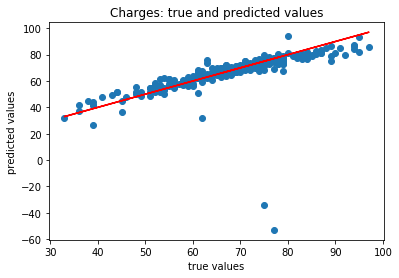

R-squared of the model in the training set is: 0.8014930511426037
-----Test set statistics-----
R-squared of the model in the test set is: 0.13016600217251761
Mean absolute error of the prediction is: 4.052367979481083


In [247]:
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)
    
# Make predictions and evalute
y_preds_train = lr.predict(X_train)
print(X_train)
y_preds_test = lr.predict(X_test)
    
    
# Plot
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()
    
    
print("R-squared of the model in the training set is: {}".format(lr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))


### 2. Lasso regression

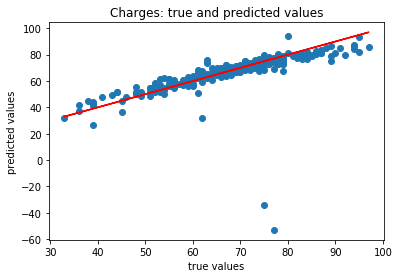

Best alpha value is: 1e-10
R-squared of the model in training set is: 0.8014930511426038
-----Test set statistics-----
R-squared of the model in test set is: 0.13016600217630747
Mean absolute error of the prediction is: 4.052367979495065
Mean squared error of the prediction is: 129.38330175167007
Root mean squared error of the prediction is: 11.374678094419643
Mean absolute percentage error of the prediction is: 6.027143259857811


In [250]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

# Plot
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

### 3. Ridge regression

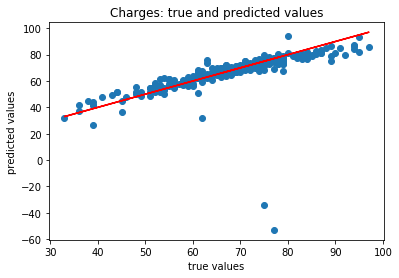

Best alpha value is: 1e-10
R-squared of the model in training set is: 0.8014930511426038
-----Test set statistics-----
R-squared of the model in test set is: 0.13016600217251928
Mean absolute error of the prediction is: 4.052367979481107
Mean squared error of the prediction is: 129.38330175223354
Root mean squared error of the prediction is: 11.37467809444441
Mean absolute percentage error of the prediction is: 6.027143259836782


In [254]:
Ridge_cv = RidgeCV(alphas=alphas, cv=5)

Ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = Ridge_cv.predict(X_train)
y_preds_test = Ridge_cv.predict(X_test)

# Plot
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(Ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(Ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

### 3. Elastic Net Regression 

In [255]:
el_net = ElasticNetCV(alphas=alphas, cv=5)

el_net.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ElasticNetCV.predict(X_train)
y_preds_test = ElasticNetCV.predict(X_test)

# Plot
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(el_net.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(el_net.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

TypeError: predict() missing 1 required positional argument: 'X'

### 4. KNN Regression

In [249]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train, y_train)
#print("R-squared of the model in the training set is: {}".format(knn.score(X_train, y_train)))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

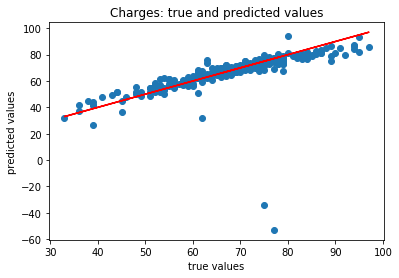

R-squared of the model in training set is: 0.9992784814675196
-----Test set statistics-----
R-squared of the model in test set is: 0.7033219034218303
Mean absolute error of the prediction is: 4.052367979481107
Mean squared error of the prediction is: 129.38330175223354
Root mean squared error of the prediction is: 11.37467809444441
Mean absolute percentage error of the prediction is: 6.027143259836782


In [263]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

knn_w.fit(X_train, y_train)

# Plot
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


print("R-squared of the model in training set is: {}".format(knn_w.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(knn_w.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Compearing different R-squared paramerers we can say KNN regression is a better model than OLS regression. It capturing about 99% of the variance in the target variable in the training et and 70% in testing set. 